In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
iris = load_iris()


In [11]:
iris = load_iris()
X = iris.data
y = iris.target
print("dataset shape : ",X.shape)
print("classes ",iris.target_names)

dataset shape :  (150, 4)
classes  ['setosa' 'versicolor' 'virginica']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("\n Decision tree classifier results: ")
print("Accuracy: ",accuracy_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred,target_names = iris.target_names))
      


 Decision tree classifier results: 
Accuracy:  1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



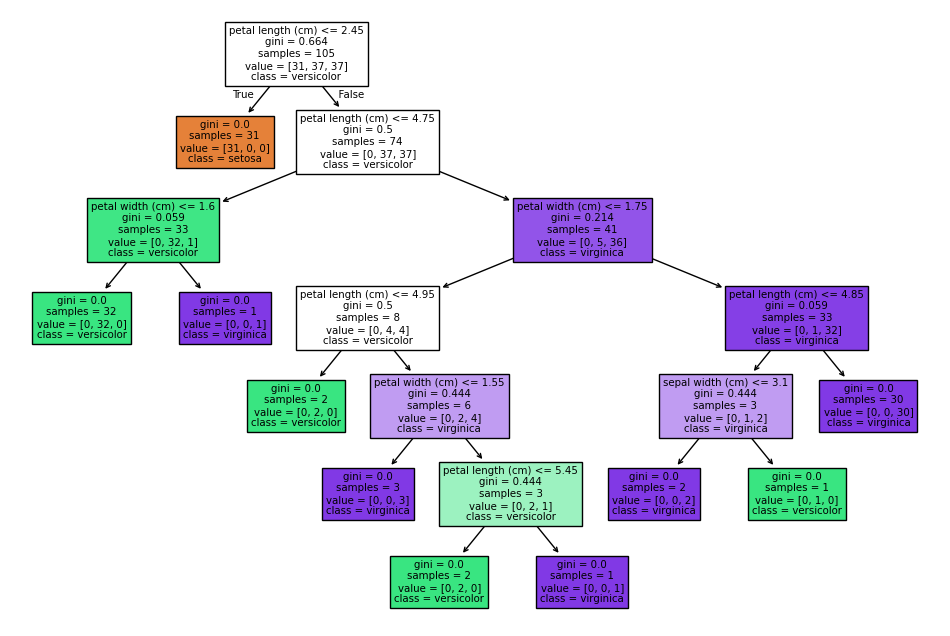

In [22]:
plt.figure(figsize = (12,8))
plot_tree(dt_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

In [27]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_pred = nb_model.predict(X_test)

print("naive bayes classfication results")
print("Accuracy: ",accuracy_score(y_test,nb_pred))
print(classification_report(y_test,nb_pred,target_names = iris.target_names))

naive bayes classfication results
Accuracy:  0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



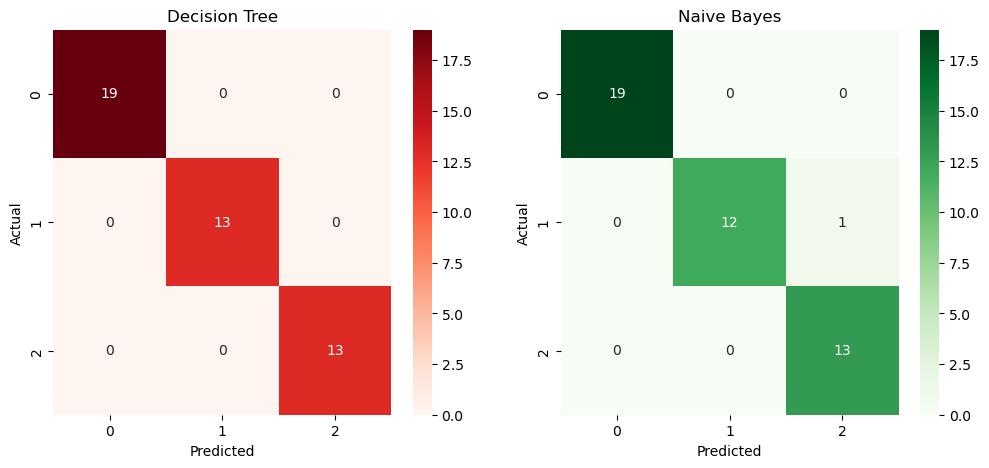

In [36]:
fig, axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,dt_pred), annot = True, fmt='d', cmap='Reds', ax = axes[0])
axes[0].set_title('Decision Tree')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Naive Bayes')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()